#### ПРИОРИТИЗАЦИЯ ГИПОТЕЗ И АНАЛИЗ РЕЗУЛЬТАТОВ А/В ТЕСТИРОВАНИЯ ПОКУПАТЕЛЬНОЙ АКТИВНОСТИ КЛИЕНТОВ ИНТЕРНЕТ-МАГАЗИНА
1. [Приоритизация гипотез](#step_8)
2. [Вычисление фактора ICE](#step_3)  
3. [Вычисление фактора RICE](#step_4)
4. [Анализ А/В теста](#abtest)
5. [Сравнение кумулятивной выручки разных групп клиентов ](#conc)
6. [Распределение кумулятивного среднего чека в группах ](#check)
7. [Динамика изменения кумулятивного среднего числа заказов на посетителя интернет-магазина](#check1)
8. [Точечное распределение заказов по клиентам](#check2)
9. [Точечное распределение стоимости заказов](#check3)
10. [Проверка статистической идентичности сырых выборок А и В для удельного числа заказов](#choose)
11. [Проверка статистической идентичности сырых выборок А и В для среднего чека](#order)   
12. [Проверка статистической идентичности очищенных выборок А и В для удельного числа заказов](#clear)
10. [Проверка статистической идентичности очищенных выборок А и В для среднего чека](#order_o)
10. [Выводы по результатам А/В тестирования ](#infer)

<div class="alert alert-info">
<a id="step_8"></a>

   <b>ПРИОРИТИЗАЦИЯ ГИПОТЕЗ</b>
  
   Изучаются гипотезы по увеличению выручки интернет магазина с помощью специальных метрик, позволяющих установить их 
приоритетность на основании численной оценки влияющих факторов. 

   <b> Задача и цель исследований </b>

   Выполнить приоритезацию гипотез, позволяющих потенциально повысить продажи интернет магазина, на основе расчета фрейворков
ICE и RICE, использующих численную оценку значимости основных влияющих факторов: Reach (охват клиентов), Impact (степень 
влияния на охваченную аудиторию), Confidence (степень уверенности в правильности численной оценки значимости факторов) и Effort 
(оценка финансовых и временных расходов на проверку гипотезы).

In [516]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import numpy as np
from scipy import stats as st
import random
import statistics as stat

In [517]:
df = pd.read_csv('/datasets/hypothesis.csv')
df

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [518]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [519]:
df.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

In [520]:
df.duplicated().sum()

0

<div class="alert alert-info">
  В загруженной таблице c исходными данными для расчета факторов приоритизации гипотез не найдено пропусков и дубликатов строк.
Типы данных установлены верные: столбец 'Hypothesis' имеет тип 'object', а остальные числовые столбца - тип 'int64'.
</div>

#### Вычисление фактора ICE
<a id="step_3"></a>

In [521]:
df['ICE'] = df['Impact']*df['Confidence']/df['Efforts']
df.sort_values(by = 'ICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000


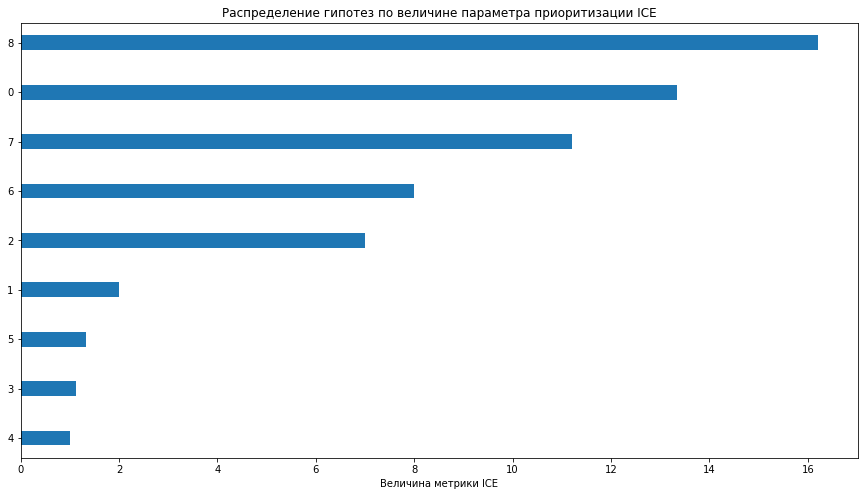

In [522]:
df.sort_values(by = 'ICE', ascending = True)['ICE'].plot(kind='barh', width = 0.3, title = 'Распределение гипотез по величине параметра приоритизации ICE',
                                             figsize=(15,8)); 
plt.xlabel('Величина метрики ICE')
plt.show()

<div class="alert alert-info">
  Лучшая гипотеза по версии ICE - запуск скидочных акций (16,2) за счет максимальных значений факторов Impact и Confidence.
Второе и третье места занимают гипотезы, соответственно, о добавлении новых каналов привлечения трафика (13,3) (максимальный
Impact (10)) и о добавлении формы подписки на все страницы сайта (11,2) (высокие Impact (7) и Confidence (8)). Самые 
низкоприоритетные гипотезы - об изменении структуры категорий товаров (1,13) (высокие усилия Effects (8)) и об изменение фона
главной страницы (1) (общий низкий уровень влияющих факторов - все по 1). 
</div>

In [523]:
m = list(df.columns)
m.remove('ICE')
m.remove('Reach')
m.pop(0)
m

['Impact', 'Confidence', 'Efforts']

In [524]:
q = []
for i in m: 
    q.append(round(df[i].corr(df['ICE']),2))
q

[0.86, 0.92, -0.02]

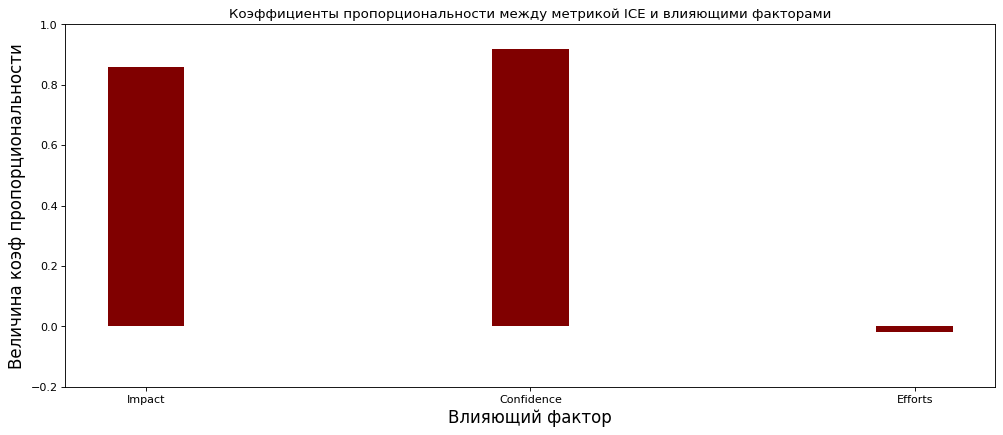

In [525]:
plt.figure(figsize=(15, 6), dpi=80)
plt.bar(m, q, color ='maroon', width = 0.2); 
plt.title('Коэффициенты пропорциональности между метрикой ICE и влияющими факторами')
plt.xlabel('Влияющий фактор', fontsize=15)
plt.ylabel('Величина коэф пропорциональности', fontsize=15)
plt.ylim([-0.2, 1])
plt.show()

<div class="alert alert-info">
  По убыванию силы влияния на ICE влияющие факторы распределяются в следующем порядке: Confidence и Impact. Фактор
Effort, соответственно, обратнопропорционален ICE и практически не оказывает влияния на его величину.
</div>

#### Вычисление фактора RICE
<a id="step_4"></a>

In [526]:
df['RICE'] = df['Reach']*df['Impact']*df['Confidence']/df['Efforts']
df.sort_values(by = 'RICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


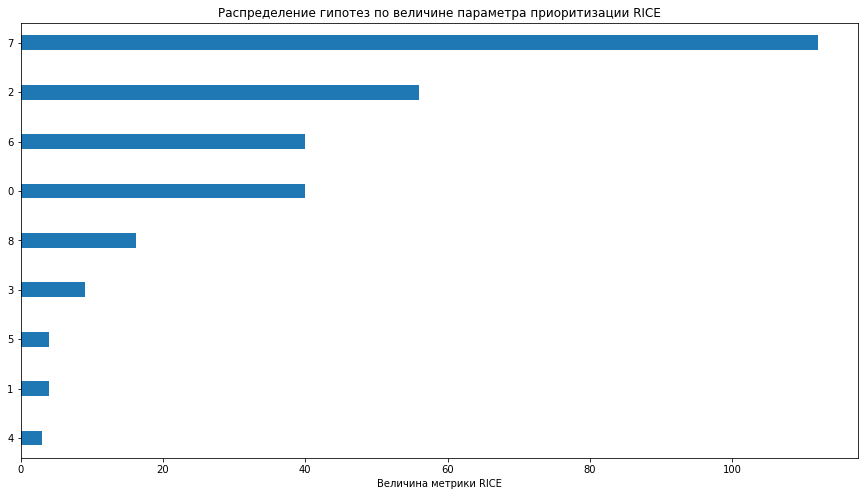

In [527]:
df.sort_values(by = 'RICE', ascending = True)['RICE'].plot(kind='barh', width = 0.3, title = 'Распределение гипотез по величине параметра приоритизации RICE',
                                             figsize=(15,8)); 
plt.xlabel('Величина метрики RICE')
plt.show()

<div class="alert alert-info">
  Лучшая гипотеза по версии RICE - добавление формы подписи на все основные страницы сайта (112) из-за максимального
охвата Reach (10) и высокой уверенности в оценке факторов Confidence (8). Она в 2 раза опережает гипотезу, занявшую 2 место
(56): добавление рекомендаций товаров на сайт (высокий Reach (8), но слабый Impact (3)). Третье место (40) делят гипотезы о 
добавлении 2 новых каналов привличения клиентов (слабый Reach (3)) и показ на главной странице баннеров с актуальными товарами
(слабый Impact). Последние места занимают гипотеза с высокими расходами на организацию или разработку Effort (10): запустиить 
собственную доставку (4) и 2 гипотезы с очень низкими значениями влияющих всех факторов (менее 3): добавить новую 
страницу с отзывами клиентов (4) и измененить цвета фона главной страницы (3).
</div>

In [528]:
d = list(df.columns)
d.remove('RICE')
d.remove('ICE')
d.pop(0)
d

['Reach', 'Impact', 'Confidence', 'Efforts']

In [529]:
w = []
for i in d: 
    w.append(round(df[i].corr(df['RICE']),2))
w

[0.72, 0.35, 0.63, -0.12]

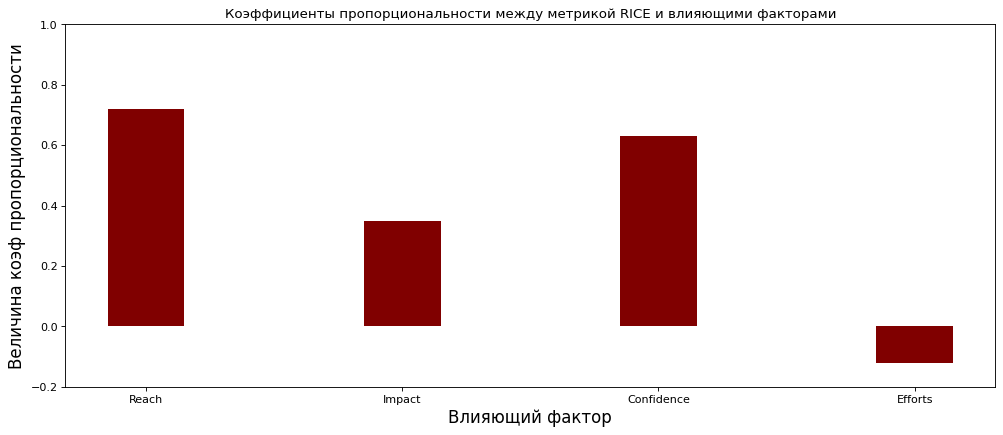

In [530]:
plt.figure(figsize=(15, 6), dpi=80)
plt.bar(d, w, color ='maroon', width = 0.3); 
plt.title('Коэффициенты пропорциональности между метрикой RICE и влияющими факторами')
plt.xlabel('Влияющий фактор', fontsize=15)
plt.ylabel('Величина коэф пропорциональности', fontsize=15)
plt.ylim([-0.2, 1])
plt.show()

<div class="alert alert-info">
  По убыванию силы влияния на RICE влияющие факторы распределяются в следующем порядке: Reach, Confidence и Impact. Фактор
Effort, соответственно, обратнопропорционален RICE.
</div>

In [531]:
q.insert(0,0)

In [532]:
r = pd.DataFrame({'factors': d,
 'RICE': w,
 'ICE': q })

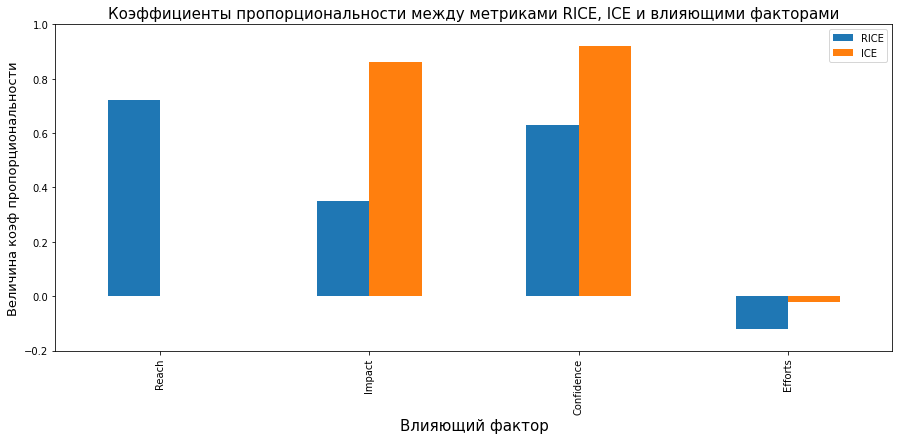

In [533]:
r[['factors', 'RICE', 'ICE']].plot(x='factors', kind='bar', stacked= False, figsize=(15, 6) )
plt.title('Коэффициенты пропорциональности между метриками RICE, ICE и влияющими факторами', fontsize=15)
plt.xlabel('Влияющий фактор', fontsize=15)
plt.ylabel('Величина коэф пропорциональности', fontsize=13)
plt.ylim([-0.2, 1])
plt.legend()
plt.show()

<div class="alert alert-info">
  При переходе от ICE к RICE значимость пропорциональных факторов Impact и Confidence снижается, соответственно, на
60 и 32 %. Это происходит за счет появления нового фактора Reach, который смещает центр равновесия метрики в сторону значимости
охвата клиентов. При этом, также несколько увеличивается роль Efforts, хотя и остается наименее значительной из всех прочих
влияющих фактолров. Благодаря фактору Reach меняется приоритетность гипотез в пользу высокого охвата аудитории, а гипотезы
с низким охватом, даже обладая значительным влиянием Impact, смещаются вниз. То есть, в отличие от ICE, на величину которого
максимальное влияние оказывают факторы Impact и Confidence, на RICE главное влияние оказывают Reach и Confidence. 
</div>

<div class="alert alert-info">
  Из-за изменения удельного веса влияющих факторов при переходе от ICE к RICE изменился порядок приоритизации конкретных гипотез.
Так, если при расчета ICE лидерские места занимали гипотезы о запуске скидочной акции, новых каналов привлечения, создание формы
подписи, показ банеров и добавление блока рекомендаций товаров, то при пояалении фактора Reach в метрике RICE порядок лидирующих
гипотез закономерно меняется в пользу гипотез с максимальным охватом аудитории: добавление на все страницы формы подписи, блоков 
рекомендаций товаров, использование новых каналов привлечения, показ актуальных банеров и введение скидочной акции. Самая 
аутсайдерская гипотеза по версии ICE (изменение цвета фона) остается таковой и в случае критерия RICE.
</div>

#### Анализ А/В теста
<a id="abtest"></a>

In [534]:
orders = pd.read_csv('/datasets/orders.csv', parse_dates=['date'])
visitors = pd.read_csv('/datasets/visitors.csv', parse_dates=['date'])
orders[:5]

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [535]:
visitors[:5]

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [536]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [537]:
orders.duplicated().sum()

0

In [538]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

<div class="alert alert-info">
   В таблице данных о продажах orders не выявлено дубликатов строк и пропусков. Типы данных в столбцах верные.
</div>

In [539]:
len(orders['visitorId'].unique())

1031

In [540]:
duplicates = orders[orders.duplicated(['visitorId'])]
len(duplicates['visitorId'])

166

In [541]:
duplicatesA = orders.query('group == "A"')[orders.query('group == "A"').duplicated(['visitorId'])]
len(duplicatesA['visitorId'])

54

In [542]:
duplicatesB = orders.query('group == "B"')[orders.query('group == "B"').duplicated(['visitorId'])]
len(duplicatesB['visitorId'])

54

In [543]:
duplicates = orders[orders.duplicated(['visitorId'])]
len(duplicates['visitorId'].unique())

94

In [544]:
d = []
for i in orders.query('group == "A"')['visitorId']:
    for j in orders.query('group == "B"')['visitorId']:
        if i == j:
            d.append(i)
dd = set(d)
len(dd), len(d)

(58, 183)

In [545]:
orders = orders[~orders['visitorId'].isin(dd)]
len(orders['visitorId'])

1016

In [546]:
duplicatesA = orders.query('group == "A"')[orders.query('group == "A"').duplicated(['visitorId'])]
len(duplicatesA['visitorId'])

23

In [547]:
duplicatesB = orders.query('group == "B"')[orders.query('group == "B"').duplicated(['visitorId'])]
len(duplicatesB['visitorId'])

20

<div class="alert alert-info">
   Таблица с заказами orders содержит 166 дубликатов в столбце 'visitorId'. Из них в таблицах A и В содержится по 54 дубликата,
а также присутствует 183 смежных (перекрестных) дубликатов, принадлежащих 58 клиентам. Перекрестные дубликаты удалялись вместе с
оригинальными ID, так как не ясно к какой группе отнести оригинальный ID. После удаления смежных дубликатов в столбце 
'visitorId' группы А осталось 23 дубликата и 20 дубликатов группы В, которые соответствуют клиентам, совершившим более 1 покупки.
</div>

In [548]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [549]:
visitors.duplicated().sum()

0

In [550]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

<div class="alert alert-info">
   В таблице данных о ежедневном количестве клиентов visitors не выявлено дубликатов строк и пропусков. Типы данных в столбцах
верные.
</div>

<div class="alert alert-info">
  <b> Сравнение кумулятивной выручки разных групп клиентов </b>
    <a id="conc"></a>
</div>

In [551]:
df_a = orders[orders['group'] == 'A'].groupby('date', as_index = False).agg({'revenue':'sum'})
df_b = orders[orders['group'] == 'B'].groupby('date', as_index = False).agg({'revenue':'sum'})
df_ab = df_a.merge(df_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
df_ab[:5]

,date,revenueA,revenueB
0,2019-08-01,142779,59758
1,2019-08-02,91602,162043
2,2019-08-03,112473,67049
3,2019-08-04,41176,96890
4,2019-08-05,86383,89908


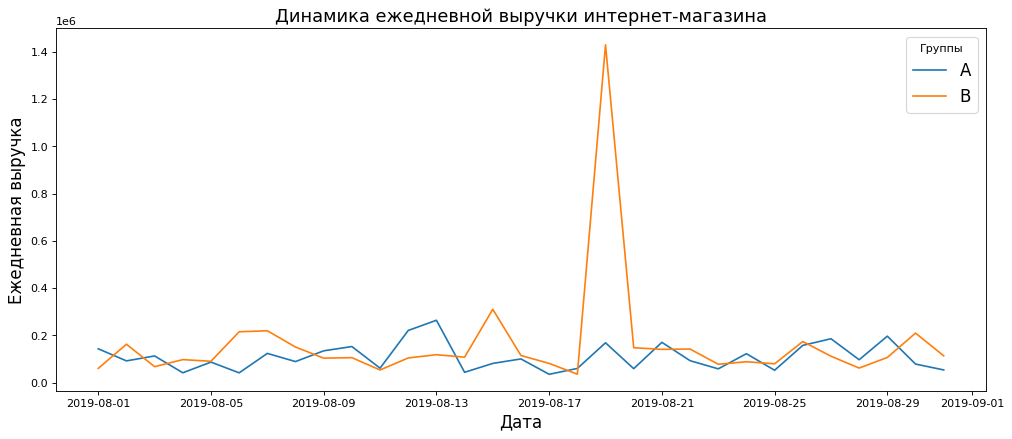

In [552]:
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(df_ab['date'], df_ab['revenueA'], label = 'A')
plt.plot(df_ab['date'], df_ab['revenueB'], label = 'B')
plt.legend(loc = 'upper right', title = 'Группы', fontsize = 15)
plt.ylabel('Ежедневная выручка', fontsize = 15)
plt.title('Динамика ежедневной выручки интернет-магазина', fontsize = 16)
plt.xlabel('Дата', fontsize = 15);

<div class="alert alert-info">
  Изучение диаграммы ежедневной выручки интернет-магазина не позволяет сделать вывод о сравнительной эффективности двух 
групп клиентов (А и В). Можно только сказать, что в группе В присутствуют аномалоьные выбросы (групные покупки) в период 
между 17.08.2019 и 21.08.2019. 
</div>

In [553]:
order_drop = orders[['date', 'group']].drop_duplicates().sort_values(by = 'date')
order_a = order_drop[order_drop['group'] == 'A'].apply(lambda x: orders[np.logical_and(orders['date']<=x['date'],\
        orders['group'] == x['group'])].agg({'date':'max', 'group':'max', 'transactionId':'nunique', 'revenue':'sum'}), axis = 1)
order_b = order_drop[order_drop['group'] == 'B'].apply(lambda x: orders[np.logical_and(orders['date']<=x['date'],\
        orders['group'] == x['group'])].agg({'date':'max', 'group':'max', 'transactionId':'nunique', 'revenue':'sum'}), axis = 1)

In [554]:
order_ab = order_a.merge(order_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
order_ab[:5]

,date,groupA,transactionIdA,revenueA,groupB,transactionIdB,revenueB
0,2019-08-01,A,23,142779,B,17,59758
1,2019-08-02,A,42,234381,B,40,221801
2,2019-08-03,A,66,346854,B,54,288850
3,2019-08-04,A,77,388030,B,68,385740
4,2019-08-05,A,99,474413,B,89,475648


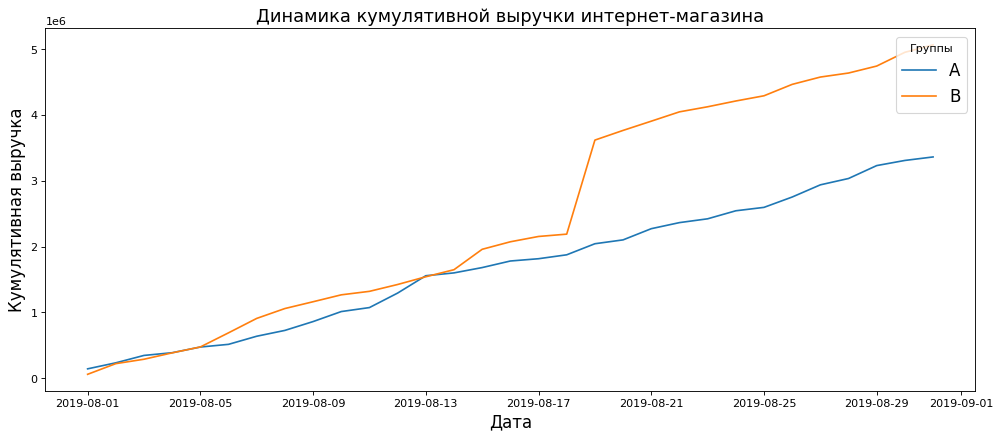

In [555]:
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(order_ab['date'], order_ab['revenueA'], label = 'A')
plt.plot(order_ab['date'], order_ab['revenueB'], label = 'B')
plt.legend(loc = 'upper right', title = 'Группы', fontsize = 15)
plt.ylabel('Кумулятивная выручка', fontsize = 15)
plt.title('Динамика кумулятивной выручки интернет-магазина', fontsize = 16)
plt.xlabel('Дата', fontsize = 15);

<div class="alert alert-info">
    Кумулятивная выручка интернет-магазина от клиентов группы В нарастает гораздо быстрее, по сравнению с клиентами группы А.
Если до 13.08.2019 развитие кумулятивной выручки для обеих групп происходило параллельно, то после этой даты различие в выручках
становится отчетливо заметно и далее разрыв между группами А и В только нарастает.
</div>

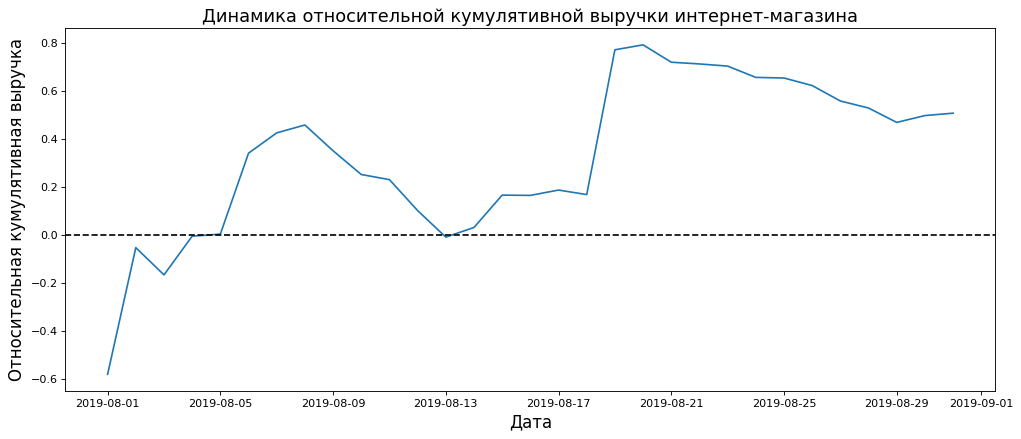

In [556]:
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(order_ab['date'], order_ab['revenueB']/order_ab['revenueA'] - 1)
plt.ylabel('Относительная кумулятивная выручка', fontsize = 15)
plt.title('Динамика относительной кумулятивной выручки интернет-магазина', fontsize = 16)
plt.xlabel('Дата', fontsize = 15)
plt.axhline(y=0, color='black', linestyle='--');

<div class="alert alert-info">
  Графики динамики кумулятивной выручки для обеих групп и график изменения относительной кумулятивной выручки свидетельствуют
о том, что скорость накопления выручки в группе B существенной превосходит скорость накопления выручки в группе А. Не смотря
на неусточивую динамику нарастания относительной выручки, которая характеризуется наличием нескольких экстремумов, в целом,
данный показатель в период эксперимента отчетливо повышается, что свидетельствует о преимуществе клиентского подхода в 
группе В. 
</div>

<div class="alert alert-info">
  <b> Распределение кумулятивного среднего чека в группах </b>
    <a id="check"></a>
</div>

In [557]:
order_ab['checkA'] = order_ab['revenueA']/order_ab['transactionIdA'] 
order_ab['checkB'] = order_ab['revenueB']/order_ab['transactionIdB'] 

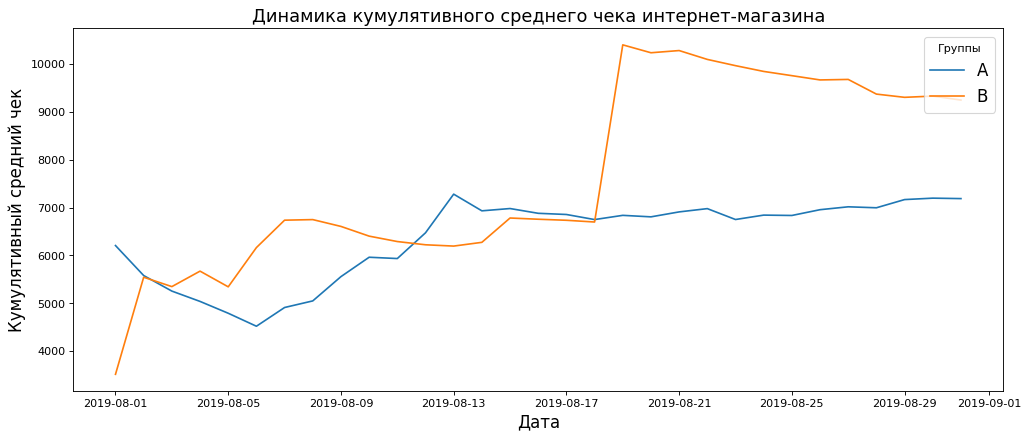

In [558]:
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(order_ab['date'], order_ab['checkA'], label = 'A')
plt.plot(order_ab['date'], order_ab['checkB'], label = 'B')
plt.legend(loc = 'upper right', title = 'Группы', fontsize = 15)
plt.ylabel('Кумулятивный средний чек', fontsize = 15)
plt.title('Динамика кумулятивного среднего чека интернет-магазина', fontsize = 16)
plt.xlabel('Дата', fontsize = 15);

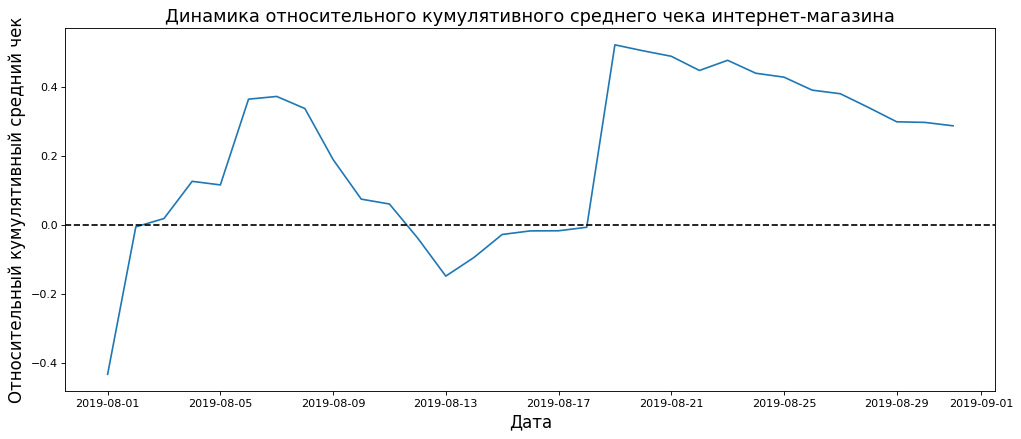

In [559]:
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(order_ab['date'], order_ab['checkB']/order_ab['checkA'] - 1)
plt.ylabel('Относительный кумулятивный средний чек', fontsize = 15)
plt.title('Динамика относительного кумулятивного среднего чека интернет-магазина', fontsize = 16)
plt.xlabel('Дата', fontsize = 15)
plt.axhline(y=0, color='black', linestyle='--');

<div class="alert alert-info">
  Изменение кумулятивного среднего чека в группах сравнения показывает, что скорость роста среднего чека в группе В существенно
превышает скорость роста среднего чека в группе А, повторяя тенденции, обнаруженные на диаграмме роста кумулятивной выручки. 
Аналоги.но себя ведет относительный средний чек, который, не смотря на минимум от 13.08.2019, имеет тенденцию к росту,
свидетельствуя о повышении продаж в группе B, по сравнению с группой А.
</div>.

<div class="alert alert-info">
  <b> Динамика изменения кумулятивного среднего числа заказов на посетителя интернет-магазина </b>
    <a id="check1"></a>
</div>

In [560]:
visitors_n = visitors[['date', 'group']]
visitors_a = visitors_n[visitors_n['group'] == 'A'].drop_duplicates().sort_values(by = 'date')
visitors_a = visitors_a.apply(lambda x: visitors[np.logical_and(visitors['group'] == x['group'], visitors['date'] <= x['date'])].\
             agg({'date':'max','group':'max','visitors':"sum"}), axis = 1).sort_values(by = 'date')
visitors_b = visitors_n[visitors_n['group'] == 'B'].drop_duplicates()
visitors_b = visitors_b.apply(lambda x: visitors[np.logical_and(visitors['group'] == x['group'], visitors['date'] <= x['date'])].\
             agg({'date':'max','group':'max','visitors':"sum"}), axis = 1).sort_values(by = 'date')
visitors_ab = visitors_a[['date','visitors']].merge(visitors_b[['date','visitors']], left_on = 'date',  right_on = 'date', \
              how = 'left', suffixes = ['A','B'])

In [561]:
order_vis = order_ab.merge(visitors_ab, left_on = 'date', right_on = 'date', how = 'left')
order_vis['order/vis_a'] = order_vis['transactionIdA']/order_vis['visitorsA']
order_vis['order/vis_b'] = order_vis['transactionIdB']/order_vis['visitorsB']
order_vis[:5]

,date,groupA,transactionIdA,revenueA,groupB,transactionIdB,revenueB,checkA,checkB,visitorsA,visitorsB,order/vis_a,order/vis_b
0,2019-08-01,A,23,142779,B,17,59758,6207.782609,3515.176471,719,713,0.031989,0.023843
1,2019-08-02,A,42,234381,B,40,221801,5580.500000,5545.025000,1338,1294,0.031390,0.030912
2,2019-08-03,A,66,346854,B,54,288850,5255.363636,5349.074074,1845,1803,0.035772,0.029950
3,2019-08-04,A,77,388030,B,68,385740,5039.350649,5672.647059,2562,2573,0.030055,0.026428
4,2019-08-05,A,99,474413,B,89,475648,4792.050505,5344.359551,3318,3280,0.029837,0.027134


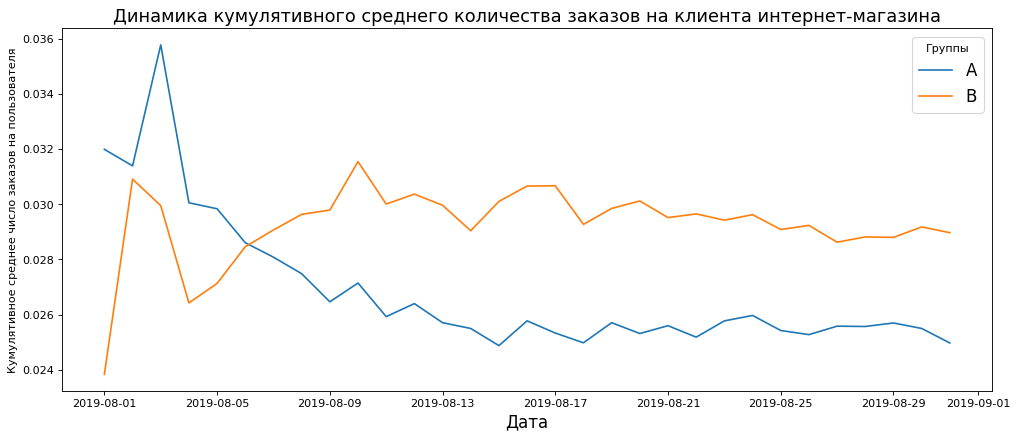

In [562]:
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(order_vis['date'], order_vis['order/vis_a'], label = 'A')
plt.plot(order_vis['date'], order_vis['order/vis_b'], label = 'B')
plt.legend(loc = 'upper right', title = 'Группы', fontsize = 15)
plt.ylabel('Кумулятивное среднее число заказов на пользователя', fontsize = 10)
plt.title('Динамика кумулятивного среднего количества заказов на клиента интернет-магазина', fontsize = 16)
plt.xlabel('Дата', fontsize = 15);

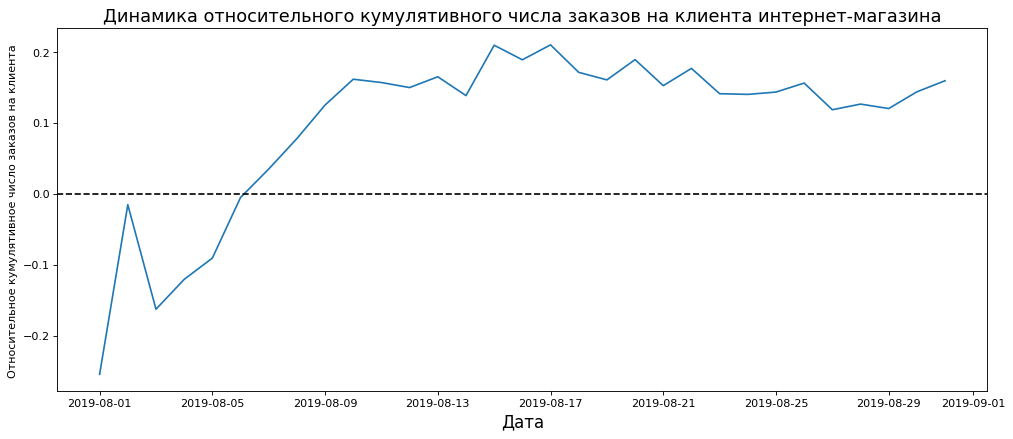

In [563]:
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(order_vis['date'], order_vis['order/vis_b']/order_vis['order/vis_a'] - 1)
plt.ylabel('Относительное кумулятивное число заказов на клиента ', fontsize = 10)
plt.title('Динамика относительного кумулятивного числа заказов на клиента интернет-магазина', fontsize = 16)
plt.xlabel('Дата', fontsize = 15)
plt.axhline(y=0, color='black', linestyle='--');

<div class="alert alert-info">
  Кумулятивные кривые динамики изменения среднего числа заказов на посетителя интернет-магазина имеют зеркальный характер и 
свидетельствует о нарастании со времененм удельного числа заказов в группе В и, соответственно, о снижении удельного количества
заказов в группе А. Кривая относительного изменения удельного числа заказов подтверждает данную тенденцию и показывает, что,
начиная с 09.08.2019, удельное количество заказов в группе В стабильно на 15 - 20 % выше, по сравнению с удельным числом
заказов в группе А. 
</div>

<div class="alert alert-info">
  <b> Точечное распределение заказов по клиентам </b>
    <a id="check2"></a>
</div>

In [564]:
df_oa = orders[orders['group'] == 'A'].groupby('visitorId', as_index = False).agg({'transactionId':'nunique'})
df_ob = orders[orders['group'] == 'B'].groupby('visitorId', as_index = False).agg({'transactionId':'nunique'})

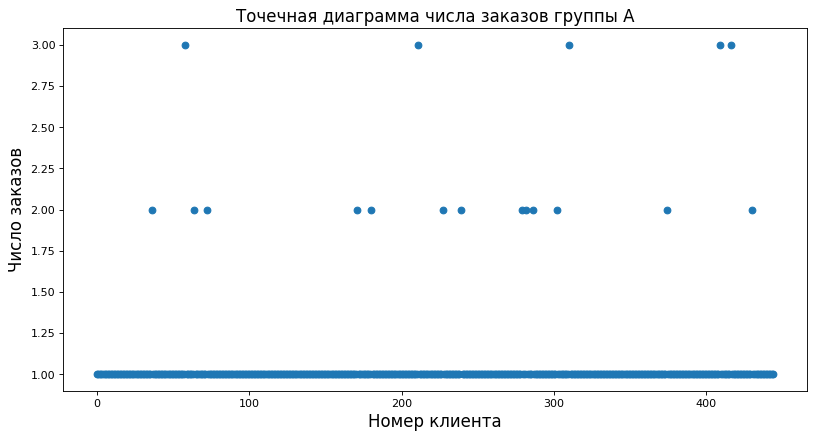

In [565]:
plt.figure(figsize=(12, 6), dpi=80)
d = range(len(df_oa))
plt.scatter(d, df_oa['transactionId']);
plt.title('Точечная диаграмма числа заказов группы А', fontsize = 15)
plt.xlabel('Номер клиента', fontsize=15)
plt.ylabel('Число заказов', fontsize=15);

<div class="alert alert-info">
  Визуальная оценка точечной диаграммы распределения заказов по клиентам группы А показывает, что максимальное число клиентов 
выполнили по 1 заказы. Существенно меньшее количество клиентов сделало по 2 или по 3 заказа. От 4 до 7 заказов выполнила
ничтожная часть клиентов. Можно сказать, что величина более 3 заказов на клиента нехарактерна и является выбросом. 
</div>

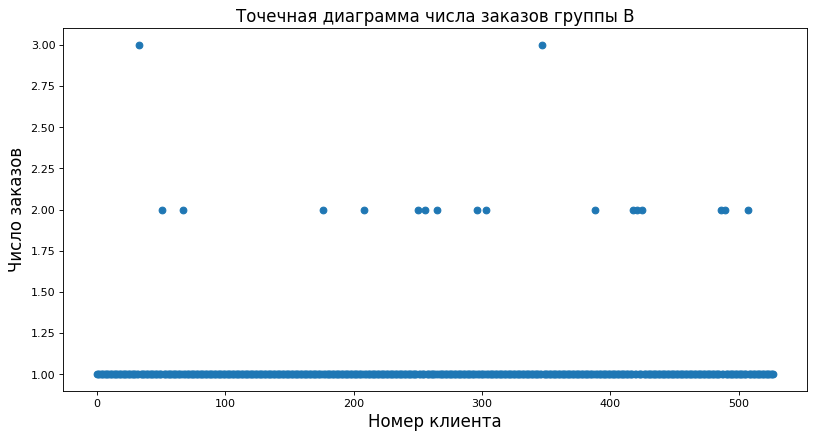

In [566]:
plt.figure(figsize=(12, 6), dpi=80)
d = range(len(df_ob))
plt.scatter(d, df_ob['transactionId']);
plt.title('Точечная диаграмма числа заказов группы В', fontsize = 15)
plt.xlabel('Номер клиента', fontsize=15)
plt.ylabel('Число заказов', fontsize=15);

<div class="alert alert-info">
  Оценка точечной диаграммы распределения заказов по клиентам показывает группы В показывает аналогичную тенденцию, что и для 
группы А: большинство клиентов делают не более 1 заказа, существенно меньшая часть клиентов выполняет 2 или 3 заказа,
более 3 заказов не характерно и является выбросом.
</div>

In [567]:
np.percentile(df_oa['transactionId'], [95, 97.5, 99])

array([1.  , 2.  , 2.56])

In [568]:
np.percentile(df_ob['transactionId'], [95, 97.5, 99])

array([1., 2., 2.])

In [569]:
df_oa['transactionId'].describe()

count    445.000000
mean       1.051685
std        0.267669
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: transactionId, dtype: float64

In [570]:
df_ob['transactionId'].describe()

count    528.000000
mean       1.037879
std        0.210008
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: transactionId, dtype: float64

<div class="alert alert-info">
  Точечные диаграммы количества заказов в группах А и В идентичны: при медианном значении заказов равном 1, среднее значение 
заказов для обеих групп близко к 1. Выбросы с числом заказов на клиента равном 3 присутствуют в обеих группах. Перцентили
же 95% и 99% для группы А составляют 2,0 и 2,56, соответственно, а для группы В оба перцентиля равны 2. 
</div>

<div class="alert alert-info">
  <b> Точечное распределение стоимости заказов </b>
    <a id="check3"></a>
</div>

In [571]:
df_ra = orders[orders['group'] == 'A']
df_rb = orders[orders['group'] == 'B']

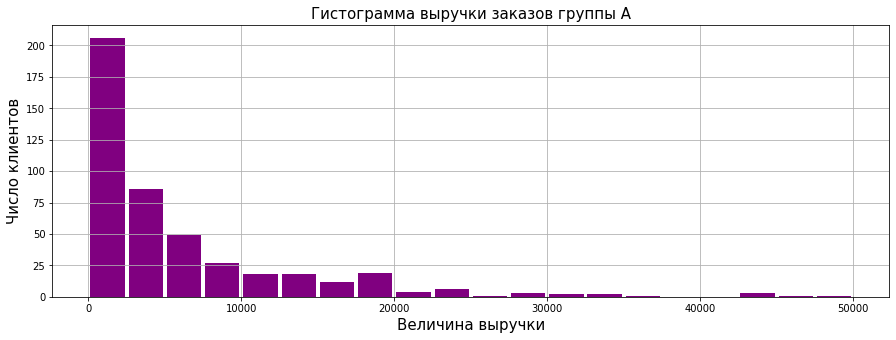

In [572]:
df_ra.hist(column='revenue', bins= 20 , grid= True , rwidth= .9 , color='purple', figsize =(15,5),  range=(0,50000));
plt.title('Гистограмма выручки заказов группы А', fontsize = 15)
plt.xlabel('Величина выручки', fontsize=15)
plt.ylabel('Число клиентов', fontsize=15);

<div class="alert alert-info">
  Гистограмма выручки заказов группы А показывает, что более 50 % клиентов совершают покупки на сумму менее 5000. Однако,
есть и выбросы с суммой чека от 20000 до 50000.
</div>

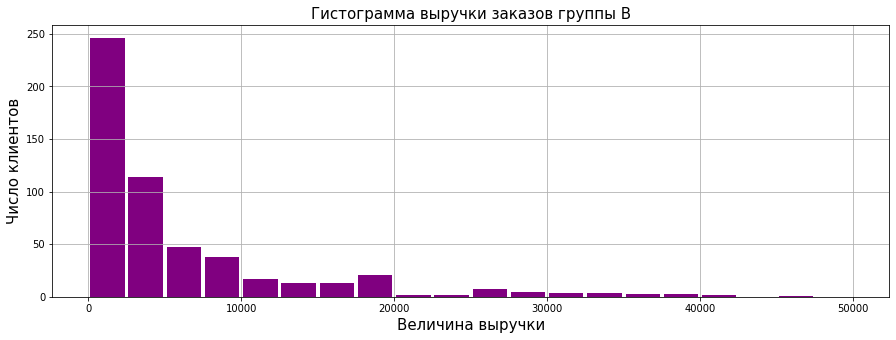

In [573]:
df_rb.hist(column='revenue', bins= 20 , grid= True , rwidth= .9 , color='purple', figsize =(15,5),  range=(0,50000));
plt.title('Гистограмма выручки заказов группы B', fontsize = 15)
plt.xlabel('Величина выручки', fontsize=15)
plt.ylabel('Число клиентов', fontsize=15);

<div class="alert alert-info">
  Гистограммы стоимости заказов группы В аналогична группе А: большинство заказов имеют чек до 5000, то есть выбросы от
20000 до 50000.
</div>

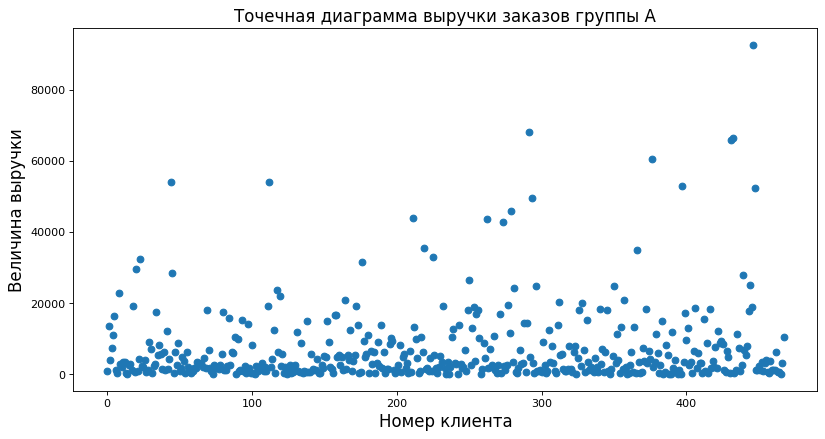

In [574]:
plt.figure(figsize=(12, 6), dpi=80)
d = range(len(df_ra))
plt.scatter(d, df_ra['revenue']);
plt.title('Точечная диаграмма выручки заказов группы А', fontsize = 15)
plt.xlabel('Номер клиента', fontsize=15)
plt.ylabel('Величина выручки', fontsize=15);

<div class="alert alert-info">
   Точечная диаграмма выручки от покупок клиентов группы А показывает максимальную плотность точек в интервале менее 10000. 
Существенно меньше чеков лежит в интервале 10000 - 20000. Остальные чеки в интервале более 20000 маргинальны, то есть 
могут квалифицироваться как выбросы.
</div>

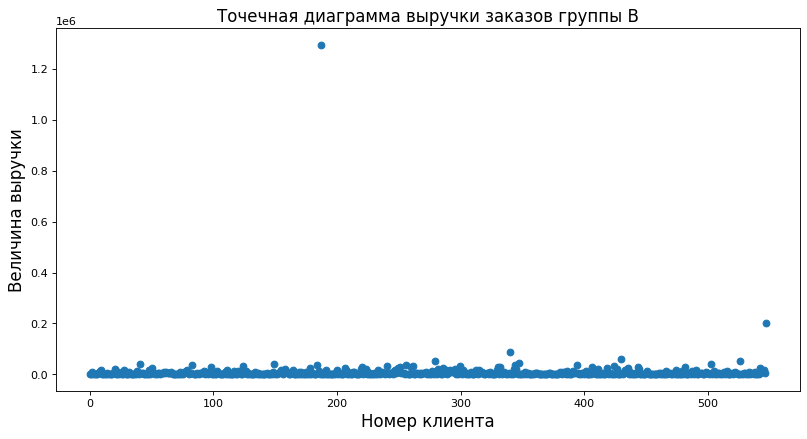

In [575]:
plt.figure(figsize=(12, 6), dpi=80)
d = range(len(df_rb))
plt.scatter(d, df_rb['revenue']);
plt.title('Точечная диаграмма выручки заказов группы B', fontsize = 15)
plt.xlabel('Номер клиента', fontsize=15)
plt.ylabel('Величина выручки', fontsize=15);

In [576]:
df_rb['revenue'].max()

1294500

<div class="alert alert-info">
  Точечная диаграмма чеков группы В смазана за счет наличия нехарактерно крупной покупки на сумму 1294500, поэтому ее анализ
затруднен. Для интерпретации диаграммы нужно исключить данный выброс из рассмотрения.
</div>

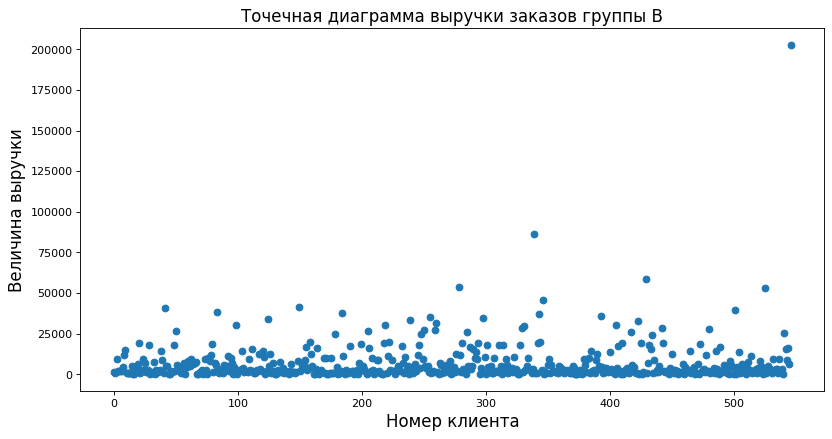

In [577]:
plt.figure(figsize=(12, 6), dpi=80)
df_rv = df_rb.query('revenue < 1294500')
d = range(len(df_rv))
plt.scatter(d, df_rv['revenue']);
plt.title('Точечная диаграмма выручки заказов группы B', fontsize = 15)
plt.xlabel('Номер клиента', fontsize=15)
plt.ylabel('Величина выручки', fontsize=15);

<div class="alert alert-info">
    На частично очищенной точечной диаграмме стоимосмти покупок группы В также есть крупные выбросы от 20000 до 220000. Но,
аналогично диаграмме группы А, большинство клиентов делают покупки на сумму до 10000.  
</div>

In [578]:
np.percentile(df_ra['revenue'], [95, 97.5, 99])

array([24944.5 , 43787.5 , 56064.18])

In [579]:
np.percentile(df_rb['revenue'], [95, 97.5, 99])

array([27561.5  , 35616.625, 49553.6  ])

In [580]:
df_ra['revenue'].describe()

count      468.000000
mean      7189.435897
std      11137.761128
min         50.000000
25%       1164.750000
50%       3090.000000
75%       8438.750000
max      92550.000000
Name: revenue, dtype: float64

In [581]:
df_rb['revenue'].describe()

count    5.480000e+02
mean     9.249949e+03
std      5.643059e+04
min      5.000000e+01
25%      1.280750e+03
50%      2.898500e+03
75%      7.991250e+03
max      1.294500e+06
Name: revenue, dtype: float64

<div class="alert alert-info">
  Гистограммы выручки от заказов групп А и B практически идентичны. Выручка от большинства заказов находится в интервале
до 10000, присутствуют выбросы с выручкой выше 30000. Более информативно сравнение точечных диаграмм, которое позволяет 
заключить, что выручка от заказов группы А имеет больше выбросов выше среднего уровня (5000 - 10000), по сравнению с группой В.
Это подтверждается величиной перцентилей выручки с заказа для обеих групп: перцентили 97,5% и 99% для группы А составляют 43788 и 
56064, соответственно, что существенно выше аналогичных перцентелей группы В - 35617 и 49554. 
  В данных заказов группы В содержатся одиночные аномалии, существенно искажающие картину распределения выручки. Размах 
стоимости заказов группы В составляет 50 - 1294500, а средняя выручка составляет 9250, в то время, как для группы А размах 
выручки раен 50 - 92550, а среднее значение только 7189. В этих условиях более объективным будет сравнение медиан: медиана 
выборки А составляет 3090 и превышает медиану выборки В - 2899. Собственно, картину распределения стоимости заказов группы В
искажает 1 аномальный заказ стоимомстью 1294500, что вызывает срезмерное увеличение стредней стоимости заказов и стандартного
отклонения, которое у заказов группы В равно 56431, что более, чем в 4 раза превышает std группы А (11138). 
</div>

<div class="alert alert-info">
  <b> Проверка статистической идентичности сырых выборок А и В для удельного числа заказов </b>
    <a id="choose"></a>
</div>

In [585]:
st.ttest_ind(df_oa['transactionId'], df_ob['transactionId'], equal_var=False, alternative='two-sided').pvalue

0.3775373897229706

In [586]:
st.ttest_ind(df_oa['transactionId'], df_ob['transactionId'], equal_var=False, alternative='less').pvalue

0.8112313051385147

In [587]:
st.ttest_ind(df_oa['transactionId'], df_ob['transactionId'], equal_var=False, alternative='greater').pvalue

0.1887686948614853

<div class="alert alert-info">
  Формулировка гипотез: H0: средние арифм. значения ген совокупностей А и В среднего числа заказов равны между собой. 
                        Н1 'greater': средн арифм ген сов А больше средн арифм ген сов В
                        Н1 'two-sided': средн арифм ген сов А и В не равны
                        H1 'less': средн арифм ген сов В больше средн арифм ген сов А
  Проверка статистической значимости различий между сырыми выборками среднего количества заказов на посетителя интернет-мегазина
методом ttest_ind() с фиксированием факта различия дисперсий генеральных совокупностей (equal_var = False) для двусторонней и
односторонних альтернатитвных гипотез показывает, что при уровне статистической значимости 5 % нулевая гипотеза о равенстве
средних арифметических ген сов не может быть опровергнута. Наименьшее значение p-value фиксируется для гипотезы 'greater' (18,9%),
а наибольщее - для альтернативной гипотезы 'less' - 81,1%.ь 
</div>

In [588]:

seq_a = pd.concat([df_oa['transactionId'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() -\
        len(df_oa['transactionId'])), name='orders_a')],axis=0)
seq_b = pd.concat([df_ob['transactionId'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() -\
        len(df_ob['transactionId'])), name='orders_b')],axis=0)

In [589]:
st.mannwhitneyu(seq_a,seq_b,True,'two-sided').pvalue

0.011018084110014696

In [590]:
st.mannwhitneyu(seq_a,seq_b,True,'less').pvalue

0.005509042055007348

In [591]:
st.mannwhitneyu(seq_a,seq_b,True,'greater').pvalue

0.9944910123339719

<div class="alert alert-info">
  Формулировка гипотез: H0: ген совокупности А и В среднего числа заказов равны между собой. 
                        Н1 'greater': ген сов А больше ген сов В
                        Н1 'two-sided': ген сов А и В не равны
                        H1 'less': ген сов В больше ген сов А
  Проверка значимости различий между генеральными совокупностями удельного числа заказов (на клиента) с применением 
непараметрического метода Манна-Уитни показывает следующую тенденцию: нулевая гипотеза отбрасывается при двусторонней и
односторонней 'less' альтернативных гипотезах (p-value << 5%), а при односторонней 'greater' гипотезе нулевая гипотеза не может
быть опровергнута. Это свидетельствует о наличии статистической значимости различий распределений удельного количества заказов, 
а также о том, что совокупность B больше совокупности A. 
</div>

<div class="alert alert-info">
  <b> Проверка статистической идентичности сырых выборок А и В для среднего чека </b>
    <a id="order"></a>
</div>

In [592]:
df_sa = orders[orders['group'] == 'A'].groupby('date', as_index = False).agg({'transactionId':'nunique', 'revenue':'sum'})
df_sa['check'] = df_sa['revenue']/df_sa['transactionId']
df_sb = orders[orders['group'] == 'B'].groupby('date', as_index = False).agg({'transactionId':'nunique', 'revenue':'sum'})
df_sb['check'] = df_sa['revenue']/df_sa['transactionId']

In [593]:
st.ttest_ind(df_sa['check'], df_sb['check'], equal_var=False, alternative='two-sided').pvalue

1.0

In [594]:
st.ttest_ind(df_sa['check'], df_sb['check'], equal_var=False, alternative='less').pvalue

0.5

In [595]:
st.ttest_ind(df_sa['check'], df_sb['check'], equal_var=False, alternative='greater').pvalue

0.5

<div class="alert alert-info">
  Формулировка гипотез: H0: средние арифм. значения ген совокупностей А и В среднего чека равны между собой. 
                        Н1 'greater': средн арифм ген сов А больше средн арифм ген сов В
                        Н1 'two-sided': средн арифм ген сов А и В не равны
                        H1 'less': средн арифм ген сов В больше средн арифм ген сов А
  Проверка значимости различий между сырыми значениями среднего чека (группировка orders по дате) для выборок А и В методом 
st.ttest_ind() показывает, что нулевая гипотеза о равенстве средн арифм сравниваемых совокупностей не может быть отброшена, 
как в случае двусторонней альтернативной гипотезы (p-value = 100%), так и в случае односторонних альтернативных гипотез 'less' 
и 'greater' (p-value по 50%).
</div>

In [596]:
df_da = orders[orders['group'] == 'A'].groupby('visitorId', as_index = False).agg({'transactionId':'nunique', 'revenue':'sum'})
df_da['check'] = df_da['revenue']/df_da['transactionId']
df_db = orders[orders['group'] == 'B'].groupby('visitorId', as_index = False).agg({'transactionId':'nunique', 'revenue':'sum'})
df_db['check'] = df_db['revenue']/df_db['transactionId']

In [597]:
st.ttest_ind(df_da['check'], df_db['check'], equal_var=False, alternative='two-sided').pvalue

0.3810176766865303

In [598]:
st.ttest_ind(df_da['check'], df_db['check'], equal_var=False, alternative='less').pvalue

0.19050883834326515

In [599]:
st.ttest_ind(df_da['check'], df_db['check'], equal_var=False, alternative='greater').pvalue

0.8094911616567348

<div class="alert alert-info">
  Формулировка гипотез: H0: средние арифм. значения ген совокупностей А и В среднего клиентского чека равны между собой. 
                        Н1 'greater': средн арифм ген сов А больше средн арифм ген сов В
                        Н1 'two-sided': средн арифм ген сов А и В не равны
                        H1 'less': средн арифм ген сов В больше средн арифм ген сов А
  Сравнение методом st.ttest_ind() последовательностей значений клиентского среднего чека (группировка orders по клиенту)
оказывается более информативна. И хотя результаты теста не позволяют отбросить нулевую гипотезу, тем не менее, p-value имеет
наименьшее значение в случае альтернативной гипотезы 'less' (19,1 %), что косвенно показывает тенденцию к тому, что 
среднее совокупности B больше среднего совокупности А.
</div>

In [600]:
st.mannwhitneyu(df_sa['check'],df_sb['check'],True,'two-sided').pvalue

1.0

In [601]:
st.mannwhitneyu(df_sa['check'],df_sb['check'],True,'less').pvalue

0.5028093426677256

In [602]:
st.mannwhitneyu(df_sa['check'],df_sb['check'],True,'greater').pvalue

0.5028093426677256

<div class="alert alert-info">
   Формулировка гипотез: H0: ген совокупности А и В среднего клиентского чека равны между собой. 
                        Н1 'greater': ген сов А больше ген сов В
                        Н1 'two-sided': ген сов А и В не равны
                        H1 'less': ген сов В больше ген сов А
   Использование непараметрического метода st.mannwhitneyu() для сравнения последовательностей значений среднего чека
(группировка orders по дате) показывает, что нулевая гипотеза о равенстве этих совокупностей не может быть отвергнута. 
</div>

In [603]:
seq_a = pd.concat([df_da['check'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() -\
        len(df_da['check'])), name='orders_a')],axis=0)
seq_b = pd.concat([df_db['check'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() -\
        len(df_db['check'])), name='orders_b')],axis=0)

In [604]:
st.mannwhitneyu(seq_a,seq_b,True,'two-sided').pvalue

0.011049357796521822

In [605]:
st.mannwhitneyu(seq_a,seq_b,True,'less').pvalue

0.005524678898260911

In [606]:
st.mannwhitneyu(seq_a,seq_b,True,'greater').pvalue

0.9944753756222926

<div class="alert alert-info">
   Формулировка гипотез: H0: ген совокупности А и В среднего клиентского чека равны между собой. 
                        Н1 'greater': ген сов А больше ген сов В
                        Н1 'two-sided': ген сов А и В не равны
                        H1 'less': ген сов В больше ген сов А
   Использование непараметрического метода st.mannwhitneyu() для сравнения последовательностей значений клиентского среднего
чека (группировка orders по клиенту) показывает, что нулевая гипотеза отвергается в случае двусторонней и односторонней 'less'
альтернативных гипотез, а в случае альтернативной гипотезы 'greater' нулевую гипотезу нельзя отбросить. Это свидетельствует
о том, что совокупность B больше, чем А. 
</div>

<div class="alert alert-info">
  <b> Проверка статистической идентичности очищенных выборок А и В для удельного числа заказов </b>
    <a id="clear"></a>
</div>

In [607]:
df_o = orders.groupby('visitorId', as_index = False).agg({'transactionId':'nunique'})

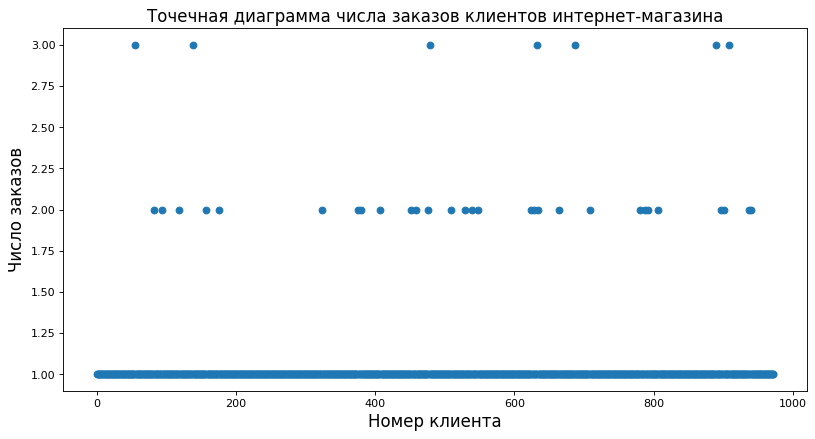

In [608]:
plt.figure(figsize=(12, 6), dpi=80)
d = range(len(df_o))
plt.scatter(d, df_o['transactionId']);
plt.title('Точечная диаграмма числа заказов клиентов интернет-магазина', fontsize = 15)
plt.xlabel('Номер клиента', fontsize=15)
plt.ylabel('Число заказов', fontsize=15);

<div class="alert alert-info">
  Точечная диаграмма числа заказов всех клиентов интернет-магазина показывает, что подавляющее большинство клиентов делают не 
более 1 заказа. Существенно меньшее количество клиентов делает от 2 до 3 заказов. Более 3 заказов нехаратерно и заведомо
является выбросом.
</div>

In [609]:
np.percentile(df_o['transactionId'], [95, 97.5, 99])

array([1., 2., 2.])

<div class="alert alert-info">
   Для всех покупающих клиентов перцентиль 95% = 2, поэтому можно исключить клиентов, сделавших более 2 покупок. 
</div>

In [610]:
df_oc = df_o[df_o['transactionId'] > 2]
df_oc['visitorId'].nunique()

7

<div class="alert alert-info">
   Из списка клиентов можно исключить 7 id, которые совершили аномально много покупок.
</div>

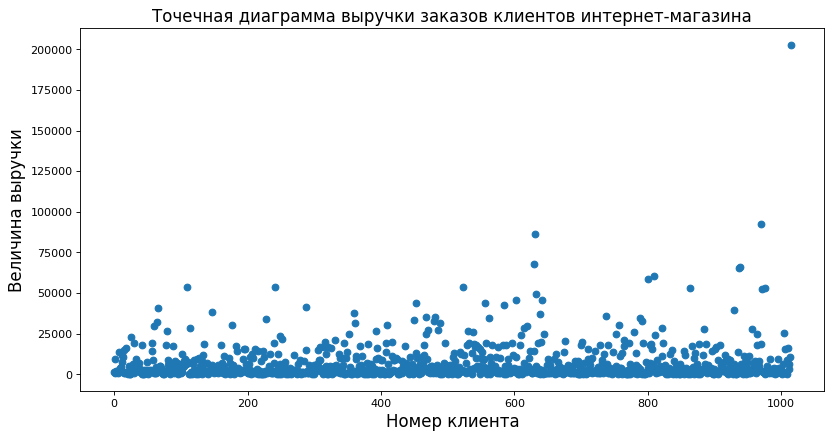

In [611]:
plt.figure(figsize=(12, 6), dpi=80)
orders_o = orders.query('revenue < 1294500')
d = range(len(orders_o))
plt.scatter(d, orders_o['revenue']);
plt.title('Точечная диаграмма выручки заказов клиентов интернет-магазина', fontsize = 15)
plt.xlabel('Номер клиента', fontsize=15)
plt.ylabel('Величина выручки', fontsize=15);

<div class="alert alert-info">
  Точечная диаграмма выручки от покупок всех клиентов (с удаленным максимальным чеком) полказывает, что подавляющее большинство
заказов до 10000, а все чеки стоимостью выше 25000 - 30000 являются выбросами.
</div>

In [612]:
np.percentile(orders['revenue'], [95, 97.5, 99])

array([26785., 37400., 53904.])

<div class="alert alert-info">
   Для всех покупающих клиентов перцентиль 95% = 37400, поэтому можно исключить клиентов, сделавших заказ на сумму 
более 40000. 
</div>

In [613]:
orders_c = orders[orders['revenue'] > 40000]
orders_c['visitorId'].nunique()

23

In [614]:
orders_cc = orders_c['visitorId'].drop_duplicates()
len(orders_cc)

23

<div class="alert alert-info">
   Из списка клиентов можно исключить 23 id, которые совершили аномально дорогие покупки.
</div>

In [615]:
seq_ex = pd.concat([df_oc['visitorId'], orders_cc],axis=0)

In [616]:
len(seq_ex)

30

<div class="alert alert-info">
   Все исключается 30 клиентов, которые совершали аномально дорогие покупки или делали аномального много заказов.
</div>

In [617]:
df_oa = df_oa[~df_oa['visitorId'].isin(seq_ex)]
df_ob = df_ob[~df_ob['visitorId'].isin(seq_ex)]
st.ttest_ind(df_oa['transactionId'], df_ob['transactionId'], equal_var=False, alternative='two-sided').pvalue

0.8018474557710069

In [618]:
st.ttest_ind(df_oa['transactionId'], df_ob['transactionId'], equal_var=False, alternative='less').pvalue

0.40092372788550346

In [619]:
st.ttest_ind(df_oa['transactionId'], df_ob['transactionId'], equal_var=False, alternative='greater').pvalue

0.5990762721144964

<div class="alert alert-info">
  Формулировка гипотез: H0: средние арифм. значения ген совокупностей А и В среднего числа заказов равны между собой. 
                        Н1 'greater': средн арифм ген сов А больше средн арифм ген сов В
                        Н1 'two-sided': средн арифм ген сов А и В не равны
                        H1 'less': средн арифм ген сов В больше средн арифм ген сов А
  Проверка статистической значимости различий между очищенными выборками среднего количества заказов на посетителя интернет-мегазина
методом ttest_ind() с фиксированием факта различия дисперсий генеральных совокупностей (equal_var = False) для двусторонней и
односторонних альтернатитвных гипотез показывает, что при уровне статистической значимости 5 % нулевая гипотеза о равенстве
средних арифметических ген сов не может быть опровергнута. Результаты теста практически не изменились, по сравнению с сырыми
данными
</div>

In [620]:
seq_a = pd.concat([df_oa['transactionId'],pd.Series(0, index=np.arange(visitors[visitors['group'] =='A']['visitors'].sum()\
        - len(seq_ex) - len(df_oa['transactionId'])), name='orders_a')],axis=0)
seq_b = pd.concat([df_ob['transactionId'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum()\
        - len(seq_ex) - len(df_ob['transactionId'])), name='orders_b')],axis=0)

In [621]:
st.mannwhitneyu(seq_a,seq_b,True,'two-sided').pvalue

0.004325799359877893

In [622]:
st.mannwhitneyu(seq_a,seq_b,True,'less').pvalue

0.0021628996799389465

In [623]:
st.mannwhitneyu(seq_a,seq_b,True,'greater').pvalue

0.9978371242077547

<div class="alert alert-info">
  Формулировка гипотез: H0: ген совокупности А и В среднего числа заказов равны между собой. 
                        Н1 'greater': ген сов А больше ген сов В
                        Н1 'two-sided': ген сов А и В не равны
                        H1 'less': ген сов В больше ген сов А
  Проверка значимости различий между генеральными совокупностями удельного числа заказов (на клиента) с применением 
непараметрического метода Манна-Уитни по очищенным данным показывает, что нулевая гипотеза отбрасывается при двусторонней и
односторонней 'less' альтернативных гипотезах (p-value << 5%), а при односторонней 'greater' гипотезе нулевая гипотеза не может
быть опровергнута. Это соответствует проверке гипотез по сырым данным. Очистка данных сделала ранее отмеченные тенденции
еще более отчетливыми - значения p-value для двусторонней и односторонней 'less' альтернативных гипотез снизились в 1,5 - 2 раза,
что позволяет в этих случаях отвергать нулевую гипотезу еще более уверенно и подтверждает факт того, что совокупность В больше
совокупности А.
</div>

<div class="alert alert-info">
  <b> Проверка статистической идентичности очищенных выборок А и В для среднего чека </b>
    <a id="order_o"></a>
</div>

In [624]:
df_sa = orders[(~orders['visitorId'].isin(seq_ex)) & (orders['group'] == 'A')].groupby('date', as_index = False).agg({'transactionId':'nunique', 'revenue':'sum'})
df_sa['check'] = df_sa['revenue']/df_sa['transactionId']
df_sb = orders[(~orders['visitorId'].isin(seq_ex)) & (orders['group'] == 'B')].groupby('date', as_index = False).agg({'transactionId':'nunique', 'revenue':'sum'})
df_sb['check'] = df_sa['revenue']/df_sa['transactionId']

In [625]:
st.ttest_ind(df_sa['check'], df_sb['check'], equal_var=False, alternative='two-sided').pvalue

1.0

In [626]:
st.ttest_ind(df_sa['check'], df_sb['check'], equal_var=False, alternative='less').pvalue

0.5

In [627]:
st.ttest_ind(df_sa['check'], df_sb['check'], equal_var=False, alternative='greater').pvalue

0.5

<div class="alert alert-info">
  Формулировка гипотез: H0: средние арифм. значения ген совокупностей А и В среднего чека равны между собой. 
                        Н1 'greater': средн арифм ген сов А больше средн арифм ген сов В
                        Н1 'two-sided': средн арифм ген сов А и В не равны
                        H1 'less': средн арифм ген сов В больше средн арифм ген сов А
  Проверка значимости различий между очищенными значениями среднего чека (группировка orders по дате) для выборок А и В методом 
st.ttest_ind() показывает, что нулевая гипотеза о равенстве средн арифм сравниваемых совокупностей не может быть отброшена. 
Значения p_value для всех альтернативных гипотез те же, что и в случе сырых данных.
</div>

In [628]:
df_da = orders[(~orders['visitorId'].isin(seq_ex)) & (orders['group'] == 'A')].groupby('visitorId', as_index = False).agg({'transactionId':'nunique', 'revenue':'sum'})
df_da['check'] = df_da['revenue']/df_da['transactionId']
df_db = orders[(~orders['visitorId'].isin(seq_ex)) & (orders['group'] == 'B')].groupby('visitorId', as_index = False).agg({'transactionId':'nunique', 'revenue':'sum'})
df_db['check'] = df_db['revenue']/df_db['transactionId']

In [629]:
st.ttest_ind(df_da['check'], df_db['check'], equal_var=False, alternative='two-sided').pvalue

0.43540762166583546

In [630]:
st.ttest_ind(df_da['check'], df_db['check'], equal_var=False, alternative='less').pvalue

0.21770381083291773

In [631]:
st.ttest_ind(df_da['check'], df_db['check'], equal_var=False, alternative='greater').pvalue

0.7822961891670823

<div class="alert alert-info">
  Формулировка гипотез: H0: средние арифм. значения ген совокупностей А и В среднего клиентского чека равны между собой. 
                        Н1 'greater': средн арифм ген сов А больше средн арифм ген сов В
                        Н1 'two-sided': средн арифм ген сов А и В не равны
                        H1 'less': средн арифм ген сов В больше средн арифм ген сов А
  Сравнение методом st.ttest_ind() последовательностей очищенных значений клиентского среднего чека (группировка orders 
по клиенту) показывает, что, хотя результаты теста не позволяют отбросить нулевую гипотезу, тем не менее, p-value имеет
наменьшее значение в случае альтернативной гипотезы 'less' (21,8 %), что косвенно подтверждает тенденцию к тому, что 
среднее совокупности B больше среднего совокупности А. Данный результат аналогичен полученному на сырых данных.
</div>

In [632]:
st.mannwhitneyu(df_sa['check'],df_sb['check'],True,'two-sided').pvalue

1.0

In [633]:
st.mannwhitneyu(df_sa['check'],df_sb['check'],True,'less').pvalue

0.5028093426677256

In [634]:
st.mannwhitneyu(df_sa['check'],df_sb['check'],True,'greater').pvalue

0.5028093426677256

<div class="alert alert-info">
   Формулировка гипотез: H0: ген совокупности А и В среднего чека равны между собой. 
                        Н1 'greater': ген сов А больше ген сов В
                        Н1 'two-sided': ген сов А и В не равны
                        H1 'less': ген сов В больше ген сов А
   Использование непараметрического метода st.mannwhitneyu() для сравнения очищенных последовательностей значений среднего чека
(группировка orders по дате) показывает тот же результат, что для сырых данных: нулевая гипотеза о равенстве совокупностей 
ьне может быть отвергнута. 
</div>

In [635]:
seq_a = pd.concat([df_da['check'], pd.Series(0, index=np.arange(visitors[visitors['group'] =='A']['visitors'].sum()\
        - len(seq_ex) - len(df_da['check'])), name='orders_a')],axis=0)
seq_b = pd.concat([df_db['check'], pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum()\
        - len(seq_ex) - len(df_db['check'])), name='orders_b')],axis=0)

In [636]:
st.mannwhitneyu(seq_a,seq_b,True,'two-sided').pvalue

0.004320662048873511

In [637]:
st.mannwhitneyu(seq_a,seq_b,True,'less').pvalue

0.0021603310244367557

In [638]:
st.mannwhitneyu(seq_a,seq_b,True,'greater').pvalue

0.9978396928351898

<div class="alert alert-info">
   Формулировка гипотез: H0: ген совокупности А и В среднего клиентского чека равны между собой. 
                         Н1 'greater': ген сов А больше ген сов В
                         Н1 'two-sided': ген сов А и В не равны
                         H1 'less': ген сов В больше ген сов А
   Использование непараметрического метода st.mannwhitneyu() для сравнения последовательностей очищенных значений клиентского 
среднего чека (группировка orders по клиенту) показывает тенденцию аналогичную для случая сырых данных: нулевая гипотеза
отвергается в случае двусторонней и односторонней 'less' альтернативных гипотез, а в случае альтернативной гипотезы 'greater' 
нулевую гипотезу нельзя отбросить. Это свидетельствует о том, что совокупность B больше, чем А. Величины p-value для 
двусторонней и односторонней 'less' гипотез в случае очищенных данных в 2 раза ниже, по сравнению с сырыми данным, что 
еще больше подчеркивает факт превосходства монжества В над множеством А. 
</div>

<div class="alert alert-info">
  <b> Выводы по результатам А/В тестирования </b>
    <a id="infer"></a>
</div>

<div class="alert alert-info">
   В ходе исследования изменения кумулятивных метрик были установлены следующие тенденции:

   -  Графики динамики кумулятивной выручки для обеих групп и график изменения относительной кумулятивной выручки свидетельствуют
о том, что скорость накопления выручки в группе B существенной превосходит скорость накопления выручки в группе А. Не смотря
на неусточивую динамику нарастания относительной выручки, которая характеризуется наличием нескольких экстремумов, в целом,
данный показатель в период эксперимента отчетливо повышается, что свидетельствует о преимуществе клиентского подхода в 
группе В. 

   - Изменение кумулятивного среднего чека в группах сравнения показывает, что скорость роста среднего чека в группе В существенно
превышает скорость роста среднего чека в группе А, повторяя тенденции, обнаруженные на диаграмме роста кумулятивной выручки. 
Аналоги.но себя ведет относительный средний чек, который, не смотря на минимум от 13.08.2019, имеет тенденцию к росту,
свидетельствуя о повышении продаж в группе B, по сравнению с группой А.

   -  Кумулятивные кривые динамики изменения среднего числа заказов на посетителя интернет-магазина имеют зеркальный характер и 
свидетельствует о нарастании со времененм удельного числа заказов в группе В и, соответственно, о снижении удельного количества
заказов в группе А. Кривая относительного изменения удельного числа заказов подтверждает данную тенденцию и показывает, что,
начиная с 09.08.2019, удельное количество заказов в группе В стабильно на 8 - 15 % выше, по сравнению с удельным числом
заказов в группе А. 

   Проверка статистической значимости различий между выборками А и В показал следующее:
        
   - Формулировка гипотез:
         Нулевая гипотеза: H0: генеральные совокупности А и В удельного числа заказов равны между собой. 
         Альтернативные гипотезы: Н1 'greater': генеральная совокупность А больше генеральной совокупности В
                                  Н1 'two-sided': генеральные совокупности А и В не равны
                                  H1 'less': генеральная совокупность В больше генеральной совокупности А
        
   - Проверка значимости различий между генеральными совокупностями удельного числа заказов (на клиента) с применением 
непараметрического метода Манна-Уитни показывает следующую тенденцию: нулевая гипотеза отбрасывается при двусторонней и
односторонней 'less' альтернативных гипотезах (p-value << 5%), а при односторонней 'greater' гипотезе нулевая гипотеза не может
быть опровергнута. Это свидетельствует о наличии статистической значимости различий распределений удельного количества заказов, 
а также о том, что совокупность B больше совокупности A. Очистка данных сделала ранее отмеченные тенденции
еще более отчетливыми - значения p-value для двусторонней и односторонней 'less' альтернативных гипотез снизились в 1,5 - 2 раза,
что позволяет в этих случаях отвергать нулевую гипотезу еще более уверенно и подтверждает факт того, что совокупность В больше
совокупности А.

   - Формулировка гипотез:
         Нулевая гипотеза: H0: генеральные совокупности А и В клиентского среднего чека равны между собой. 
         Альтернативные гипотезы: Н1 'greater': генеральная совокупность А больше генеральной совокупности В
                                  Н1 'two-sided': генеральные совокупности А и В не равны
                                  H1 'less': генеральная совокупность В больше генеральной совокупности А

   - Использование непараметрического метода st.mannwhitneyu() для сравнения последовательностей значений клиентского среднего
чека (группировка orders по клиенту) показывает, что нулевая гипотеза отвергается в случае двусторонней и односторонней 'less'
альтернативных гипотез, а в случае альтернативной гипотезы 'greater' нулевую гипотезу нельзя отбросить. Это свидетельствует
о том, что совокупность B больше, чем А. Величины p-value для двусторонней и односторонней 'less' гипотез в случае очищенных 
данных в 2 раза ниже, по сравнению с сырыми данным, что еще больше подчеркивает факт превосходства множества В над множеством А.

  Таким образом, результаты анализа А/В тестирования достаточно достоверно показывает превосходство группы В над
группой А по исследуемым основным метрикам (выручка, количество заказов на клиента и средний чек), что позволяет остановить
эксперимент и зафиксировать победу группы В. 
</div>